In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
# from hopf_helper import calc_and_plot_hopf_maruyama, set_axes_title
# import hopf_helper as hh


In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ews_analysis import hopf_helper as hh


In [3]:
"""
r_dot = mu*r - r^3
theta_dot = omega + b*r^2
mu_dot = epsilon
"""

r_0 = 0.1
omega = 2
b = 1
theta_0 = 0
mu_0 = -2.0
epsilon = 0.01
sigma = 0.9 # noise
t_span, t_points= 410, 50000 
time = np.linspace(0, t_span, t_points)
dt = t_span/t_points
ews_win_size, ews_offset = 21, 1
 

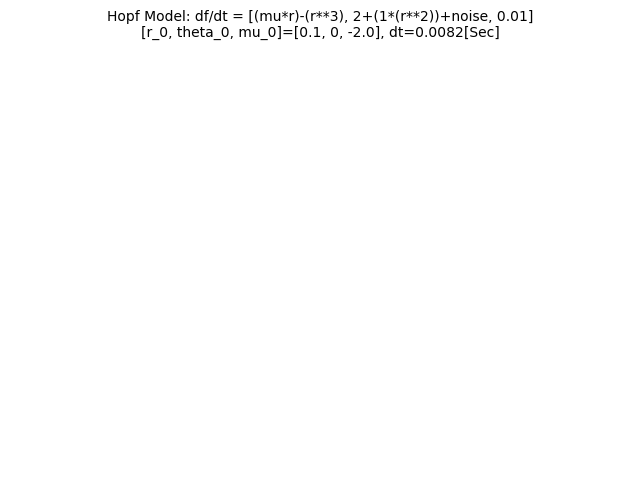

In [4]:
# Plot Hopf sim solutions
# fig = plt.figure(figsize=(16, 8))
fig = plt.figure()
ttl = f"""Hopf Model: df/dt = [(mu*r)-(r**3), {omega}+({b}*(r**2))+noise, {epsilon}]
[r_0, theta_0, mu_0]=[{r_0}, {theta_0}, {mu_0}], dt={dt}[Sec]"""
fig.suptitle(ttl, fontsize=10)
spec = fig.add_gridspec(3, 2)

In [5]:
# Hopf with noise
ax00 = fig.add_subplot(spec[0, :])

# returns (t_star, ax, results, derivatives)
noisy_hopf = hh.calc_and_plot_hopf_maruyama(
    ax00, time, r_0, omega, theta_0, mu_0, epsilon, noise=sigma, b=b,
    label=None, color='b'
)
t_star = noisy_hopf[0]
hh.set_axes_title(ax00, f'Hopf With noise (={sigma})', fontsize=4)

In [6]:
type(noisy_hopf[2])
noisy_hopf[2].shape



(50000, 3)

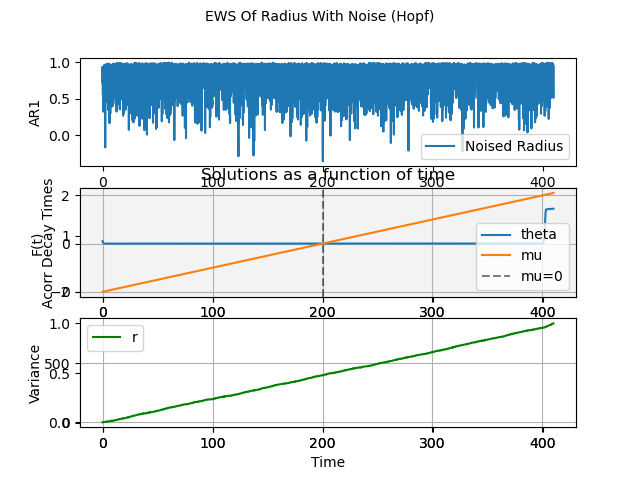

In [10]:
ax2 = fig.add_subplot(spec[2, :])
ax1 = fig.add_subplot(spec[1, :], sharex=ax2)
hh.set_axes_title(ax1, 'Solutions as a function of time', fontsize=6)
ax1.set_facecolor(plt.cm.gray(.95))
ax1.set_ylabel('F(t)')

for i in [0,2]:
    ax1.plot(time, noisy_hopf[2][:,i], label='theta' if i==0 else 'mu')
ax1.axvline(noisy_hopf[0], color='k', linestyle='--', alpha=0.5, label='mu=0')
# ax1.plot(time, noisy_hopf[2][:,1], label='r')

ax2.plot(time, noisy_hopf[2][:,1], label='r', color='g')

for ax in [ax1, ax2]:
    ax.legend()
    ax.grid()    


plt.show()

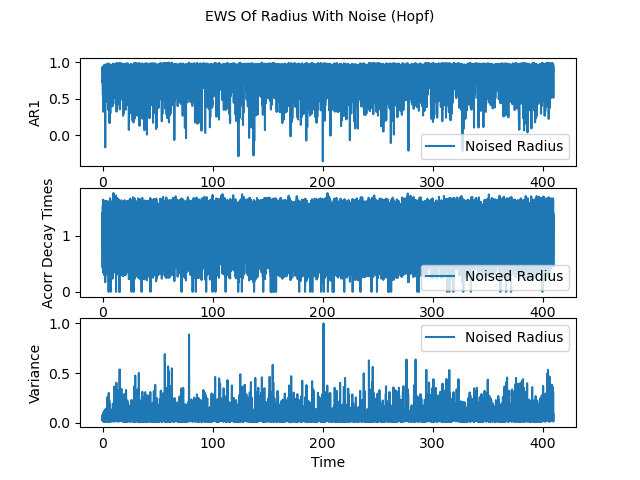

In [8]:
fig = plt.figure()
fig.suptitle('EWS Of Radius With Noise (Hopf)', fontsize=10)
spec = fig.add_gridspec(3, 2)
axs = [fig.add_subplot(spec[i, :]) for i in range(3)]
# With noise
fig, axs, block_idxs, ar1s, decays, vars = hh.calc_and_plot_ews(
    fig, axs, time, noisy_hopf[2][:,1], 
    ews_win_size, ews_offset, label='Noised Radius'
)

Failed to calculate ar1s. Error in #4543
index 4543 is out of bounds for axis 0 with size 4543
Failed to calculate ar_decay_times. Error in #4543
index 4543 is out of bounds for axis 0 with size 4543
Failed to calculate vars. Error in #4543
index 4543 is out of bounds for axis 0 with size 4543


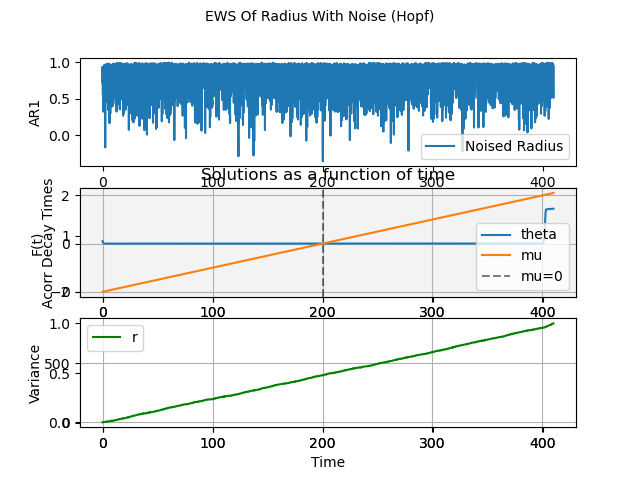

In [11]:
ews_win_size, ews_offset = 31, 11
# fig.clf()
# for ax in axs:
#     ax.clear()  
#     ax.cla()

fig, axs, block_idxs, ar1s, decays, vars = hh.calc_and_plot_ews(
    fig, axs, time, noisy_hopf[2][:,1], 
    ews_win_size, ews_offset, label='Noised Radius'
    )

plt.show()